# Chapter 2: End to End Machine Learning Project

https://www.kaggle.com/dipam7/student-grade-prediction

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
student_df = pd.read_csv("../data/student/student-mat.csv", sep=";")

In [3]:
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Framing the Problem

- Supervised learning
- Regression
- Multiple Regression(many features)
- Univariate Regression(predicting one feature)

## Select a Performance Measure

- Root Mean Square Error
    - The square root of the mean of the squared differences between predicted and actual

## Exploratory Data Analysis

In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
student_df["sex"].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [6]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


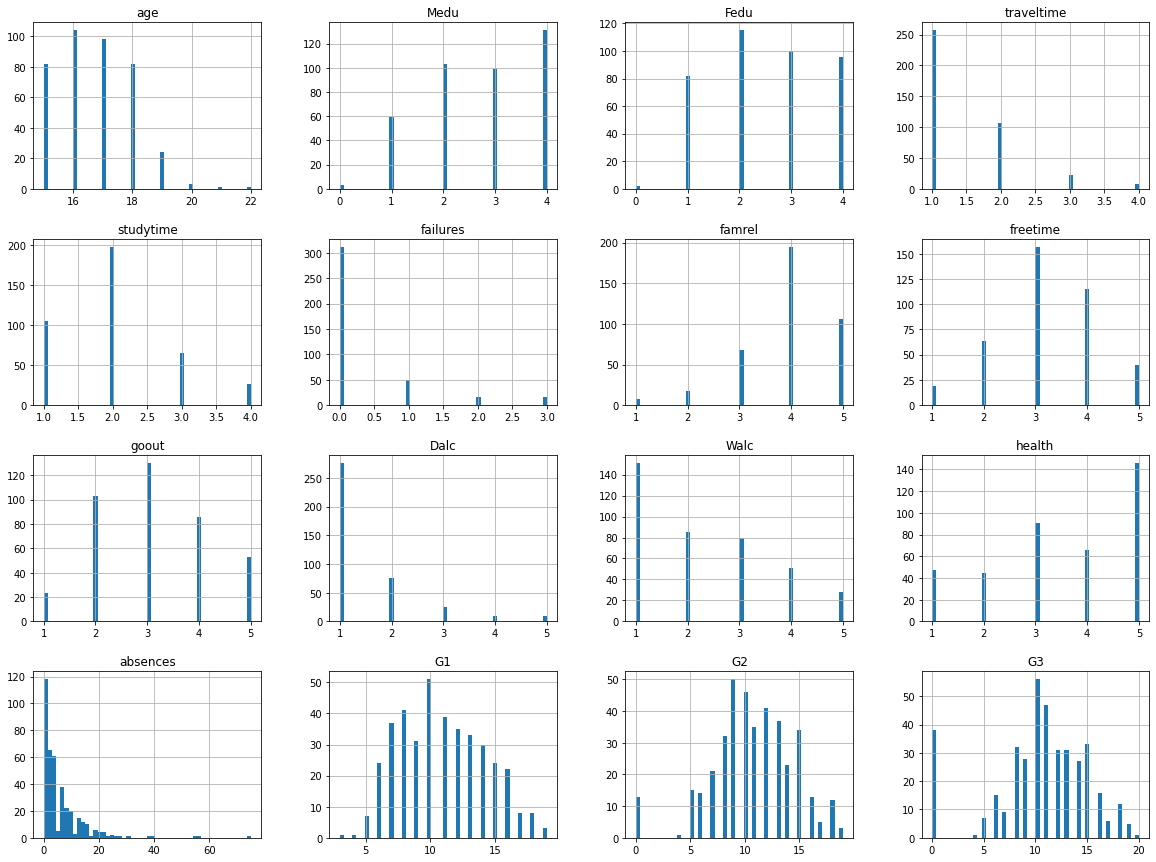

In [7]:
student_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
student_df.groupby("sex").count()

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
sex,,,,,,,,,,,,,,,,,,,,,
F,208,208,208,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,208,208,208
M,187,187,187,187,187,187,187,187,187,187,...,187,187,187,187,187,187,187,187,187,187


In [9]:
student_df.groupby("Pstatus").count()

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Pstatus,,,,,,,,,,,,,,,,,,,,,
A,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
T,354,354,354,354,354,354,354,354,354,354,...,354,354,354,354,354,354,354,354,354,354


In [10]:
# Father's Education
student_df.groupby("Fedu").count()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Fedu,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
2,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96


In [11]:
# Mother's Education
student_df.groupby("Medu").count()

,school,sex,age,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Medu,,,,,,,,,,,,,,,,,,,,,
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
2,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
3,99,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
4,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131


## Create a Testset

- You can use hashing so that your test set will be consistent even if you update your dataset.
- Make sure that everytime you get a test train split, it will be the same split
    - you can seed it with `np.random.seed(42)`

### Using a random 20% of the dataset and setting it aside

In [12]:
import numpy as np

In [13]:
def split_train_test(data, test_ratio, seed=42):
    np.random.seed(42)
    # Shuffle the indexes 
    shuffled_indices = np.random.permutation(len(data))
    # Calculate how much needed in test set
    test_set_size = int(len(data) * test_ratio)
    # Get a slice of test and train
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    # Return train and test set
    return data.loc[train_indices], data.iloc[test_indices]

In [14]:
student_train, student_test = split_train_test(student_df, 0.2)

In [15]:
student_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
194,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
173,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,GP,M,15,U,GT3,T,4,2,other,other,...,3,3,3,1,1,3,0,10,10,10
106,GP,F,15,U,GT3,T,2,2,other,other,...,5,1,2,1,1,3,8,7,8,8
270,GP,F,19,U,GT3,T,3,3,other,services,...,4,3,5,3,3,5,15,9,9,9
348,GP,F,17,U,GT3,T,4,3,health,other,...,4,4,3,1,3,4,0,13,15,15


In [16]:
student_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,8,8,10
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12
248,GP,M,18,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8,3,5,5
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,8,9,10
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,MS,F,17,R,GT3,T,1,2,other,services,...,3,2,2,1,2,3,0,12,11,12
82,GP,F,15,U,LE3,T,3,2,services,other,...,4,4,4,1,1,5,10,7,6,6
114,GP,M,15,R,GT3,T,2,1,health,services,...,5,4,2,1,1,5,8,9,9,9
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


### Using instance identifier

- the current solution will generate a new dataset when ran again.
    - overtime the model will see all the data, which should be avoided
    - you could seed the random, but this will break once you've updata the data set
- Instead, you can use each instance's identifier to decide if it goes in the test or train set
    - You can calculate the hash of each identifier and put the hashes lower than 20% of the max

In [17]:
from zlib import crc32

In [18]:
def test_set_check(identifier, testratio):
    # Getting all the indexed that are below the total hash * test ratio
    return crc32(np.int64(identifier)) & 0xffffffff < testratio * 2**32

In [19]:
def split_train_test_by_id(data, test_ratio, id_column):
    # Pandas series of each rows id/index
    ids = data[id_column]
    # Getting the indexes that are above/below the total hash
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    # Slicing the data by indexes
    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
student_df_id = student_df.reset_index()

In [21]:
train_set, test_set = split_train_test_by_id(student_df_id, 0.2, "index")

In [22]:
train_set

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
6,6,GP,M,16,U,LE3,T,2,2,other,...,4,4,4,1,1,3,0,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,389,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,1,5,0,6,5,0
390,390,MS,M,20,U,LE3,A,2,2,services,...,5,5,4,4,5,4,11,9,9,9
391,391,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,3,14,16,16
392,392,MS,M,21,R,GT3,T,1,1,other,...,5,5,3,3,3,3,3,10,8,7


In [23]:
test_set

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
5,5,GP,M,16,U,LE3,T,4,3,services,...,5,4,2,1,2,5,10,15,15,15
12,12,GP,M,15,U,LE3,T,4,4,health,...,4,3,3,1,3,5,2,14,14,14
16,16,GP,F,16,U,GT3,T,4,4,services,...,3,2,3,1,2,2,6,13,14,14
23,23,GP,M,16,U,LE3,T,2,2,other,...,5,4,4,2,4,5,0,13,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,373,MS,F,17,R,GT3,T,1,2,other,...,3,5,5,1,3,1,14,6,5,5
379,379,MS,F,17,R,GT3,T,3,1,at_home,...,4,5,4,2,3,1,17,10,10,10
387,387,MS,F,19,R,GT3,T,2,3,services,...,5,4,2,1,2,5,0,7,5,0
388,388,MS,F,18,U,LE3,T,3,1,teacher,...,4,3,4,1,1,1,0,7,9,8


- You can either add an index column or use a unique identifier that won't change
- If you use the row index, make sure that the new data gets appended to the bottom, and that no row ever gets deleted

### With Sklearn

- sklearn's `train_test_split` does more than the function we defined earlier
    - has a `random_state` parameter that allows you set the random generator seed
    - you can pass it multiple datasets with identical number of rows, and will split them the same way

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_student, test_student = train_test_split(student_df, test_size=0.2, random_state=42)

In [26]:
train_student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
194,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
173,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,GP,M,15,U,GT3,T,4,2,other,other,...,3,3,3,1,1,3,0,10,10,10
106,GP,F,15,U,GT3,T,2,2,other,other,...,5,1,2,1,1,3,8,7,8,8
270,GP,F,19,U,GT3,T,3,3,other,services,...,4,3,5,3,3,5,15,9,9,9
348,GP,F,17,U,GT3,T,4,3,health,other,...,4,4,3,1,3,4,0,13,15,15


In [27]:
test_student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,8,8,10
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12
248,GP,M,18,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8,3,5,5
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,8,9,10
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,MS,F,17,R,GT3,T,1,2,other,services,...,3,2,2,1,2,3,0,12,11,12
82,GP,F,15,U,LE3,T,3,2,services,other,...,4,4,4,1,1,5,10,7,6,6
114,GP,M,15,R,GT3,T,2,1,health,services,...,5,4,2,1,1,5,8,9,9,9
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


## Stratified Sampling

- stratified sampling
    - sampling that tries to get the same ratio of a certain feature as the population
- Make sure to have enough instances in each strata
    - Don't have too many strata

### Counting how many absences per group

<AxesSubplot:>

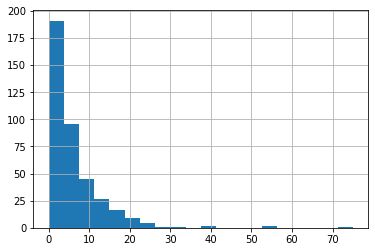

In [28]:
student_df["absences"].hist(bins=20)

### Filling the Nan's with the Mean

In [29]:
# Filling all the Nans with mean in a different dataset, and getting the new absences column
student_df["absences_filled"] = student_df.fillna(student_df.mean())["absences"]

### Creating groups based on counts

In [30]:
# First bin is -0.5 because it will not put 0 in any of the bins
student_df["absences_cat"] =  pd.cut(student_df["absences_filled"], 
                                     bins=[-0.5, 1, 3, 5, 7, np.inf],
                                     labels=[1.0, 2.0, 3.0, 4.0, 5.0])

<AxesSubplot:>

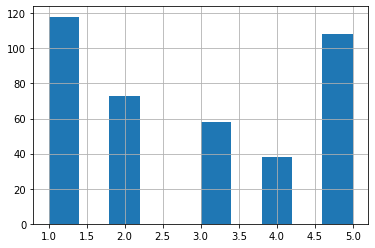

In [31]:
student_df["absences_cat"].hist()

### Stratifying

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [33]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [34]:
for train_index, test_index in split.split(student_df, student_df["absences_cat"]):
    strat_train_set = student_df.loc[train_index]
    strat_test_set = student_df.loc[test_index]

In [35]:
strat_train_set["absences_cat"].value_counts() / len(strat_train_set)

1.0    0.300633
5.0    0.275316
2.0    0.183544
3.0    0.145570
4.0    0.094937
Name: absences_cat, dtype: float64

In [36]:
strat_test_set["absences_cat"].value_counts() / len(strat_test_set)

1.0    0.291139
5.0    0.265823
2.0    0.189873
3.0    0.151899
4.0    0.101266
Name: absences_cat, dtype: float64

## Remove the category label so that the data is back to where it was

In [37]:
strat_train_set = strat_train_set.drop("absences_cat", axis=1, errors='ignore')
strat_train_set = strat_train_set.drop("absences", axis=1, errors='ignore')

strat_test_set = strat_test_set.drop("absences_cat", axis=1, errors='ignore')
strat_test_set = strat_test_set.drop("absences", axis=1, errors='ignore')


In [38]:
strat_test_set

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_filled
290,GP,M,18,U,GT3,T,4,2,teacher,other,...,4,3,2,1,4,5,12,11,11,11
296,GP,F,19,U,GT3,T,4,4,health,other,...,2,3,4,2,3,2,10,9,0,0
66,GP,M,15,U,GT3,A,4,4,other,services,...,1,3,3,5,5,3,13,13,12,4
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,3,5,2,1,1,3,18,19,19,10
157,GP,F,18,R,GT3,T,1,1,at_home,other,...,5,2,5,1,5,4,9,8,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,GP,F,16,U,LE3,T,2,2,services,services,...,4,3,3,2,3,4,12,13,13,2
219,GP,F,17,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,1,4,9,10,10,4
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,8,9,8,0
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,7,10,10,2


## Discover and Visualize the Data to Gain Insights

In [39]:
## Create a copy of training set so that you don't edit it
training_df = strat_train_set.copy()

## Looking for Correlations

- This measures linear correlation and may miss other types of relationships

In [40]:
corr_matrix = training_df.corr()

- Top correlations to the target output

In [41]:
corr_matrix["G3"].sort_values()

failures          -0.373699
age               -0.178002
goout             -0.121575
traveltime        -0.118867
health            -0.060970
Dalc              -0.059070
Walc              -0.037479
freetime           0.016730
famrel             0.046859
absences_filled    0.048841
studytime          0.090681
Fedu               0.199013
Medu               0.248046
G1                 0.795004
G2                 0.902527
G3                 1.000000
Name: G3, dtype: float64

### Scatterplot

- Creating a scatter plot to visualize the correlations

In [42]:
from pandas.plotting import scatter_matrix

In [43]:
training_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'G1', 'G2', 'G3', 'absences_filled'],
      dtype='object')

In [44]:
home_life = ['Medu', 'Fedu', 'traveltime', 'famrel', 'freetime', 'G3']            

array([[<AxesSubplot:xlabel='Medu', ylabel='Medu'>,
        <AxesSubplot:xlabel='Fedu', ylabel='Medu'>,
        <AxesSubplot:xlabel='traveltime', ylabel='Medu'>,
        <AxesSubplot:xlabel='famrel', ylabel='Medu'>,
        <AxesSubplot:xlabel='freetime', ylabel='Medu'>,
        <AxesSubplot:xlabel='G3', ylabel='Medu'>],
       [<AxesSubplot:xlabel='Medu', ylabel='Fedu'>,
        <AxesSubplot:xlabel='Fedu', ylabel='Fedu'>,
        <AxesSubplot:xlabel='traveltime', ylabel='Fedu'>,
        <AxesSubplot:xlabel='famrel', ylabel='Fedu'>,
        <AxesSubplot:xlabel='freetime', ylabel='Fedu'>,
        <AxesSubplot:xlabel='G3', ylabel='Fedu'>],
       [<AxesSubplot:xlabel='Medu', ylabel='traveltime'>,
        <AxesSubplot:xlabel='Fedu', ylabel='traveltime'>,
        <AxesSubplot:xlabel='traveltime', ylabel='traveltime'>,
        <AxesSubplot:xlabel='famrel', ylabel='traveltime'>,
        <AxesSubplot:xlabel='freetime', ylabel='traveltime'>,
        <AxesSubplot:xlabel='G3', ylabel='traveltime

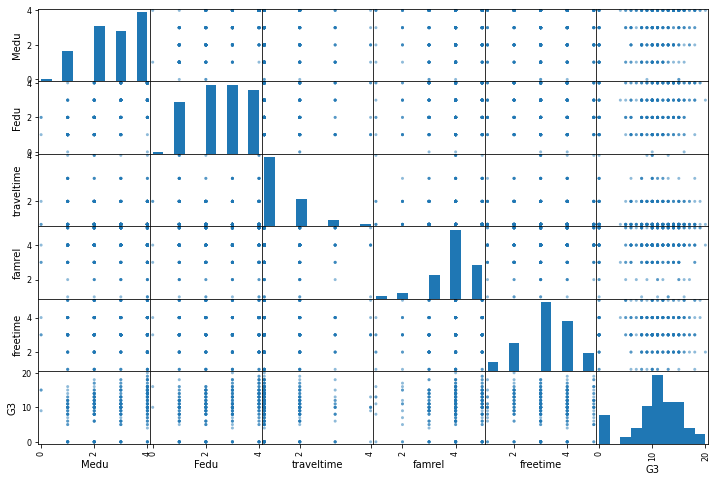

In [45]:
scatter_matrix(training_df[home_life], figsize=(12,8))

In [46]:
personal_life = ['Dalc', 'Walc', 'studytime', 'goout', 'absences_filled', 'G3']

array([[<AxesSubplot:xlabel='Dalc', ylabel='Dalc'>,
        <AxesSubplot:xlabel='Walc', ylabel='Dalc'>,
        <AxesSubplot:xlabel='studytime', ylabel='Dalc'>,
        <AxesSubplot:xlabel='goout', ylabel='Dalc'>,
        <AxesSubplot:xlabel='absences_filled', ylabel='Dalc'>,
        <AxesSubplot:xlabel='G3', ylabel='Dalc'>],
       [<AxesSubplot:xlabel='Dalc', ylabel='Walc'>,
        <AxesSubplot:xlabel='Walc', ylabel='Walc'>,
        <AxesSubplot:xlabel='studytime', ylabel='Walc'>,
        <AxesSubplot:xlabel='goout', ylabel='Walc'>,
        <AxesSubplot:xlabel='absences_filled', ylabel='Walc'>,
        <AxesSubplot:xlabel='G3', ylabel='Walc'>],
       [<AxesSubplot:xlabel='Dalc', ylabel='studytime'>,
        <AxesSubplot:xlabel='Walc', ylabel='studytime'>,
        <AxesSubplot:xlabel='studytime', ylabel='studytime'>,
        <AxesSubplot:xlabel='goout', ylabel='studytime'>,
        <AxesSubplot:xlabel='absences_filled', ylabel='studytime'>,
        <AxesSubplot:xlabel='G3', ylabel='

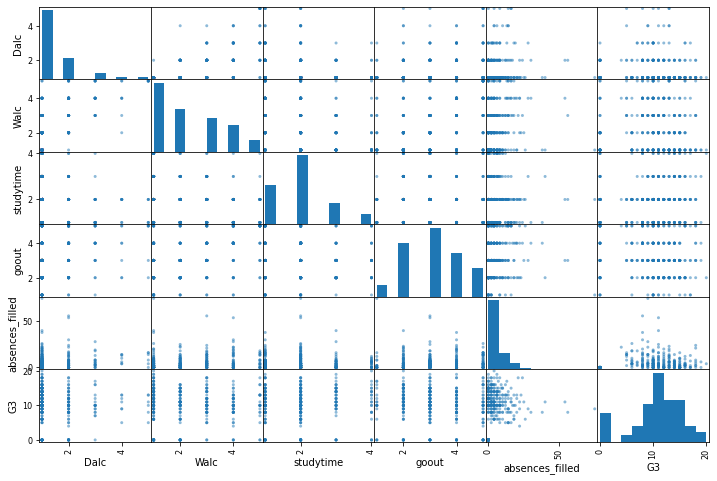

In [47]:
scatter_matrix(training_df[personal_life], figsize=(12,8))

In [48]:
previous_performance = ['health', 'failures', 'G1', 'G2', 'G3']

array([[<AxesSubplot:xlabel='health', ylabel='health'>,
        <AxesSubplot:xlabel='failures', ylabel='health'>,
        <AxesSubplot:xlabel='G1', ylabel='health'>,
        <AxesSubplot:xlabel='G2', ylabel='health'>,
        <AxesSubplot:xlabel='G3', ylabel='health'>],
       [<AxesSubplot:xlabel='health', ylabel='failures'>,
        <AxesSubplot:xlabel='failures', ylabel='failures'>,
        <AxesSubplot:xlabel='G1', ylabel='failures'>,
        <AxesSubplot:xlabel='G2', ylabel='failures'>,
        <AxesSubplot:xlabel='G3', ylabel='failures'>],
       [<AxesSubplot:xlabel='health', ylabel='G1'>,
        <AxesSubplot:xlabel='failures', ylabel='G1'>,
        <AxesSubplot:xlabel='G1', ylabel='G1'>,
        <AxesSubplot:xlabel='G2', ylabel='G1'>,
        <AxesSubplot:xlabel='G3', ylabel='G1'>],
       [<AxesSubplot:xlabel='health', ylabel='G2'>,
        <AxesSubplot:xlabel='failures', ylabel='G2'>,
        <AxesSubplot:xlabel='G1', ylabel='G2'>,
        <AxesSubplot:xlabel='G2', ylabel='G

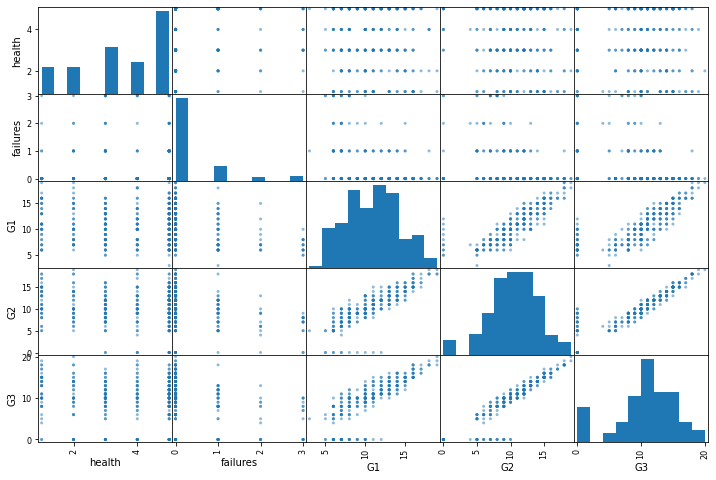

In [49]:
scatter_matrix(training_df[previous_performance], figsize=(12,8))

### Attribute Combinations

In [50]:
training_df["study_time_ratio"] = training_df["studytime"] / training_df["freetime"]

In [51]:
study_time_att = ["studytime", "freetime", "study_time_ratio", "G3"]

array([[<AxesSubplot:xlabel='studytime', ylabel='studytime'>,
        <AxesSubplot:xlabel='freetime', ylabel='studytime'>,
        <AxesSubplot:xlabel='study_time_ratio', ylabel='studytime'>,
        <AxesSubplot:xlabel='G3', ylabel='studytime'>],
       [<AxesSubplot:xlabel='studytime', ylabel='freetime'>,
        <AxesSubplot:xlabel='freetime', ylabel='freetime'>,
        <AxesSubplot:xlabel='study_time_ratio', ylabel='freetime'>,
        <AxesSubplot:xlabel='G3', ylabel='freetime'>],
       [<AxesSubplot:xlabel='studytime', ylabel='study_time_ratio'>,
        <AxesSubplot:xlabel='freetime', ylabel='study_time_ratio'>,
        <AxesSubplot:xlabel='study_time_ratio', ylabel='study_time_ratio'>,
        <AxesSubplot:xlabel='G3', ylabel='study_time_ratio'>],
       [<AxesSubplot:xlabel='studytime', ylabel='G3'>,
        <AxesSubplot:xlabel='freetime', ylabel='G3'>,
        <AxesSubplot:xlabel='study_time_ratio', ylabel='G3'>,
        <AxesSubplot:xlabel='G3', ylabel='G3'>]], dtype=objec

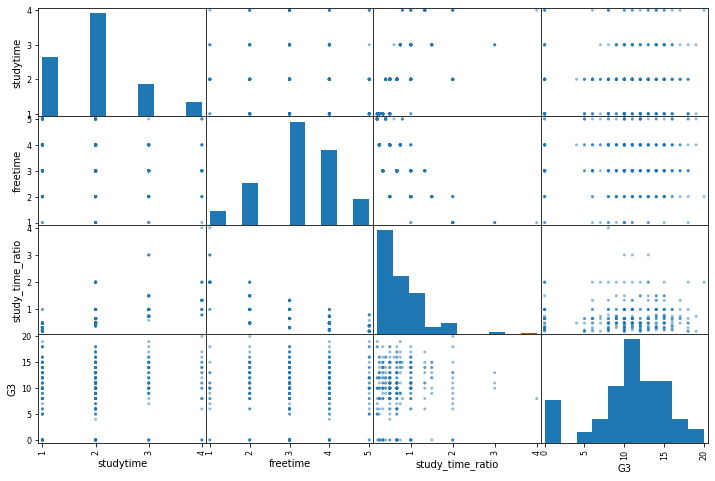

In [52]:
scatter_matrix(training_df[study_time_att], figsize=(12,8))

In [53]:
corr_matrix = training_df.corr()

In [54]:
corr_matrix["G3"]

age                -0.178002
Medu                0.248046
Fedu                0.199013
traveltime         -0.118867
studytime           0.090681
failures           -0.373699
famrel              0.046859
freetime            0.016730
goout              -0.121575
Dalc               -0.059070
Walc               -0.037479
health             -0.060970
G1                  0.795004
G2                  0.902527
G3                  1.000000
absences_filled     0.048841
study_time_ratio    0.032198
Name: G3, dtype: float64

## Preparing the Data for Machine Learning Algorithms

- You should create functions to prepare data
    - You can reproduce these preparations to any dataset and 
    - Allows you to start creating a library
- Seperating the predictors from the labels

In [55]:
student_info = strat_train_set.drop("G3", axis=1)
final_grades = strat_train_set["G3"].copy()

In [56]:
student_info

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,absences_filled
264,GP,F,18,U,GT3,T,2,2,at_home,services,...,yes,4,3,3,1,1,3,9,10,0
123,GP,M,16,U,GT3,T,4,4,health,other,...,no,3,4,4,1,4,5,14,11,18
104,GP,M,15,U,GT3,A,3,4,services,other,...,no,5,4,4,1,1,1,16,18,0
34,GP,M,16,U,GT3,T,3,2,other,other,...,no,5,4,3,1,1,5,12,14,0
96,GP,M,16,R,GT3,T,4,3,services,other,...,no,3,3,3,1,1,4,11,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,GP,M,17,U,LE3,T,1,1,health,other,...,no,4,4,4,1,2,5,7,9,2
18,GP,M,17,U,GT3,T,3,2,services,services,...,no,5,5,5,2,4,5,6,5,16
368,MS,F,18,U,GT3,T,2,3,at_home,services,...,yes,5,2,3,1,2,4,11,10,0
102,GP,M,15,U,GT3,T,4,4,services,other,...,no,5,3,3,1,1,5,10,13,4


In [57]:
final_grades

264     0
123    13
104    18
34     15
96     15
       ..
255     8
18      5
368    10
102    14
126    11
Name: G3, Length: 316, dtype: int64

## Data Cleaning

- For attributes with missing values, you can:
    - Drop the row with the missing value
        - dropna()
    - Drop the attribute
        - drop()
    - Set the value to some value
        - fillna()
        - If you use median or mean, make sure to save it so that you can fill new rows without changing the median/mean

In [58]:
from sklearn.impute import SimpleImputer

- Use `scikit`'s `imputer`to take care of missing values. You can specify what you want to replace the values with.
- Start by creating a copy of the data without text attributes

In [59]:
# all columns that aren't object types, i.e. numerical
for col, col_type in zip(strat_test_set.columns, strat_train_set.dtypes):
    if col_type != "object":
        print(col)

age
Medu
Fedu
traveltime
studytime
failures
famrel
freetime
goout
Dalc
Walc
health
G1
G2
G3
absences_filled


In [60]:
numbered_col = [col for col, col_type in zip(strat_test_set.columns, strat_train_set.dtypes) if col_type != "object"]

In [61]:
numbered_col

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'G1',
 'G2',
 'G3',
 'absences_filled']

In [62]:
num_only_strat_test_set = strat_test_set[numbered_col].copy()

### Filling in missing values with imputer

In [63]:
imputer = SimpleImputer(strategy="median")

In [64]:
imputer.fit(num_only_strat_test_set)

SimpleImputer(strategy='median')

- The way that the `imputer` will fill the empty value will be stored in `statistics_`

In [65]:
imputer.statistics_

array([17.,  3.,  2.,  1.,  2.,  0.,  4.,  3.,  3.,  1.,  2.,  4., 11.,
       11., 11.,  4.])

- Use the trained imputer to transform the training set
- this will give back a Numpy array which can be plugged into the Pandas DF

In [66]:
filled_in_array = imputer.transform(num_only_strat_test_set)

In [67]:
filled_in_array

array([[18.,  4.,  2., ..., 11., 11., 11.],
       [19.,  4.,  4., ...,  9.,  0.,  0.],
       [15.,  4.,  4., ..., 13., 12.,  4.],
       ...,
       [16.,  2.,  1., ...,  9.,  8.,  0.],
       [15.,  1.,  1., ..., 10., 10.,  2.],
       [18.,  4.,  4., ...,  8.,  8., 15.]])

In [68]:
student_num_train = pd.DataFrame(data=filled_in_array, columns=num_only_strat_test_set.columns)

In [69]:
student_num_train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_filled
0,18.0,4.0,2.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,4.0,5.0,12.0,11.0,11.0,11.0
1,19.0,4.0,4.0,2.0,2.0,0.0,2.0,3.0,4.0,2.0,3.0,2.0,10.0,9.0,0.0,0.0
2,15.0,4.0,4.0,1.0,4.0,0.0,1.0,3.0,3.0,5.0,5.0,3.0,13.0,13.0,12.0,4.0
3,15.0,4.0,2.0,1.0,1.0,0.0,3.0,5.0,2.0,1.0,1.0,3.0,18.0,19.0,19.0,10.0
4,18.0,1.0,1.0,3.0,1.0,3.0,5.0,2.0,5.0,1.0,5.0,4.0,9.0,8.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16.0,2.0,2.0,3.0,2.0,0.0,4.0,3.0,3.0,2.0,3.0,4.0,12.0,13.0,13.0,2.0
75,17.0,2.0,2.0,1.0,3.0,0.0,4.0,3.0,3.0,1.0,1.0,4.0,9.0,10.0,10.0,4.0
76,16.0,2.0,1.0,2.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,3.0,8.0,9.0,8.0,0.0
77,15.0,1.0,1.0,2.0,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,7.0,10.0,10.0,2.0


### Scikit Learn Design

- Consistency
    - Estimator: 
        - Object that can estimate a parameter based on a data set
        - Estimation is done by `fit()` method
        - Takes only datasets(with or without labels) as parameters
        - Everything else that changes the setting of the estimator will be a hyperparameter(aka manually set) and usually done with the constructor parameter
    - Tranformer:
        - Estimators that can transform a dataset, usually need to be trained. 
        - Transformation is done with `transform()` method and the dataset to be transformed as the parameter
        - There is also the `fit_transform()` method which is usually optomized
    - Predictor: 
        - An estimator that can be used to make predictions
        - Uses the `predict()` method to make predictions
        - Uses the `score()` method to measure the quality of the predictions
    - Inspection:
        - Estimator's hyperparameters are viewable with public instance variables, like `estimator.strategy`
        - Learned parameters are accesible with public instance variables with an underscore, like `estimator.statistics_`
    - Nonproliferation of classes:
        - datasets are either Numpy arrays or scipy matrices
        - hyperparameters are strings or numbers
    - Composition:
        - Existing building blocks are used as much as possible
    - Sensible defaults:

## Handeling Text and Categorical Attributes

In [70]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

- You can turn text categories into ordered numbers

In [71]:
ordinal_encoder = OrdinalEncoder()

- Or you can have a seperate category for each number, and encode it as yes or no

In [72]:
cat_encoder = OneHotEncoder()

In [73]:
mom_job_catergories = cat_encoder.fit_transform(student_info[["Mjob"]])

In [74]:
mom_job_catergories

<316x5 sparse matrix of type '<class 'numpy.float64'>'
	with 316 stored elements in Compressed Sparse Row format>

- This is a sparse array without zeroes being saved to save space
- You can change it to a Numpy array with `.toarray()`

In [75]:
mom_job_catergories.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [76]:
cat_encoder.categories_

[array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)]

## Custom Transformers

- You'll need to create your own transformer if you want to have a custom cleanup operation or combine specific attributes
- Create a custom transformer by creating a class and implementing the `fit()`(returning self), `transform()`, and `fit_transform()` method. 
    - You can get `fit_transform()` for free by adding `TransformerMixin` as the base class
    - If you add `BaseEstimator` as a base class, you'll get the `get_params()` and `set_params()` methods. This is good for automatic hyperparameter tuning
    

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin

- Having a hyper parameter will allow you to easily check if an attribute helps with the ML algorithm or not
- You can also exclude any operations you're note sure of with a hyperparameter
- This helps you automate data prepration, saving you time

In [78]:
for index, col in enumerate(student_info.columns):
    print("{}: {}".format(index, col))

0: school
1: sex
2: age
3: address
4: famsize
5: Pstatus
6: Medu
7: Fedu
8: Mjob
9: Fjob
10: reason
11: guardian
12: traveltime
13: studytime
14: failures
15: schoolsup
16: famsup
17: paid
18: activities
19: nursery
20: higher
21: internet
22: romantic
23: famrel
24: freetime
25: goout
26: Dalc
27: Walc
28: health
29: G1
30: G2
31: absences_filled


In [79]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_absences_over_family=True): # don't add kargs or args
        self.add_absences_over_family = add_absences_over_family
    def fit(self, df_values, y=None):
        return self # nothing else to do
    def transform(self, df_values, y=None):
        # Dalc / goout
        alcohol_over_friends = df_values[:, 26] / df_values[:, 25]
        if self.add_absences_over_family:
            # absences_filled / famrel
            absenses_over_family = df_values[:, 31] / df_values[:, 23]            
            return np.c_[df_values, alcohol_over_friends, absenses_over_family]
        else:
            return np.c_[df_values, alcohol_over_friends]

In [80]:
attr_addr = CombinedAttributesAdder()

In [81]:
student_extra_attr = attr_addr.transform(student_info.values)

In [82]:
student_info["Dalc"] / student_info["goout"]

264    0.333333
123    0.250000
104    0.250000
34     0.333333
96     0.333333
         ...   
255    0.250000
18     0.400000
368    0.333333
102    0.333333
126    0.500000
Length: 316, dtype: float64

In [83]:
student_extra_attr[:, 32]

array([0.3333333333333333, 0.25, 0.25, 0.3333333333333333,
       0.3333333333333333, 0.3333333333333333, 1.0, 0.2,
       0.3333333333333333, 0.5, 0.3333333333333333, 0.6, 0.25, 1.0, 1.0,
       2.0, 0.6, 0.5, 0.25, 0.3333333333333333, 0.3333333333333333, 1.0,
       0.5, 0.4, 0.5, 0.3333333333333333, 0.3333333333333333, 1.0, 0.4,
       0.5, 0.5, 0.25, 0.5, 0.5, 0.5, 1.0, 0.6, 1.0, 0.5,
       0.3333333333333333, 0.4, 0.4, 0.5, 0.5, 0.5, 0.25,
       0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.25,
       0.6666666666666666, 3.0, 0.5, 0.3333333333333333, 0.5, 0.5, 0.5,
       0.6666666666666666, 0.3333333333333333, 0.5, 0.25, 0.25, 0.5, 0.2,
       0.5, 0.6666666666666666, 0.3333333333333333, 1.0,
       0.3333333333333333, 0.6, 1.0, 0.3333333333333333,
       0.3333333333333333, 0.25, 0.3333333333333333, 0.25,
       1.6666666666666667, 0.25, 0.3333333333333333, 0.25, 2.0, 0.5, 1.0,
       0.3333333333333333, 0.5, 0.2, 1.0, 0.25, 0.3333333333333333, 1.0,
       1.0,

## Feature Scaling

- Features must be scaled similarily because ML algorithms don't work well with very different magnitudes
- Scaling the target numbers is generally not necessary

### Min Max Scaling

- Also called normalization
- Values are adjusted so that all the numbers are in the range of 0 to 1
    - For each number subtract the minimum value, then divide by the maximum minus the minimum

In [84]:
def quick_minmax_scaling(input_arr=[0, 3, 5]):
    np_arr = np.array(input_arr)
    return (np_arr - np_arr.min(axis=0)) / (np_arr.max(axis=0) - np_arr.min(axis=0))

In [85]:
minmax_me = np.array([[0,1, 100], [2,3,-100]])

In [86]:
quick_minmax_scaling(minmax_me)

array([[0., 0., 1.],
       [1., 1., 0.]])

- or just `MinMaxScaler()`

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
student_num_train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_filled
0,18.0,4.0,2.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,4.0,5.0,12.0,11.0,11.0,11.0
1,19.0,4.0,4.0,2.0,2.0,0.0,2.0,3.0,4.0,2.0,3.0,2.0,10.0,9.0,0.0,0.0
2,15.0,4.0,4.0,1.0,4.0,0.0,1.0,3.0,3.0,5.0,5.0,3.0,13.0,13.0,12.0,4.0
3,15.0,4.0,2.0,1.0,1.0,0.0,3.0,5.0,2.0,1.0,1.0,3.0,18.0,19.0,19.0,10.0
4,18.0,1.0,1.0,3.0,1.0,3.0,5.0,2.0,5.0,1.0,5.0,4.0,9.0,8.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16.0,2.0,2.0,3.0,2.0,0.0,4.0,3.0,3.0,2.0,3.0,4.0,12.0,13.0,13.0,2.0
75,17.0,2.0,2.0,1.0,3.0,0.0,4.0,3.0,3.0,1.0,1.0,4.0,9.0,10.0,10.0,4.0
76,16.0,2.0,1.0,2.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,3.0,8.0,9.0,8.0,0.0
77,15.0,1.0,1.0,2.0,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,7.0,10.0,10.0,2.0


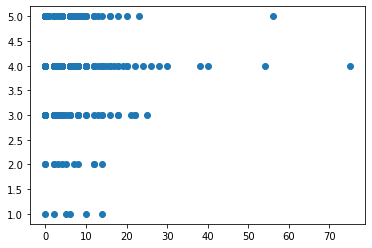

In [89]:
plt.scatter(student_info["absences_filled"], student_info["famrel"])

### Using the MinMax Scaler

In [90]:
real_minmax = MinMaxScaler()

In [91]:
real_minmax.fit(student_num_train)

MinMaxScaler()

In [92]:
student_num_minmax = real_minmax.transform(student_num_train)

### Updating the dataframe with MinMaxed Values

In [93]:
minmax_Df = pd.DataFrame(student_num_minmax, columns=student_num_train.columns)

In [94]:
minmax_Df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_filled
0,0.6,1.000000,0.333333,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.00,0.75,1.00,0.571429,0.578947,0.578947,0.55
1,0.8,1.000000,1.000000,0.333333,0.333333,0.000000,0.25,0.50,0.75,0.25,0.50,0.25,0.428571,0.473684,0.000000,0.00
2,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.00,0.50,0.50,1.00,1.00,0.50,0.642857,0.684211,0.631579,0.20
3,0.0,1.000000,0.333333,0.000000,0.000000,0.000000,0.50,1.00,0.25,0.00,0.00,0.50,1.000000,1.000000,1.000000,0.50
4,0.6,0.000000,0.000000,0.666667,0.000000,1.000000,1.00,0.25,1.00,0.00,1.00,0.75,0.357143,0.421053,0.526316,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.2,0.333333,0.333333,0.666667,0.333333,0.000000,0.75,0.50,0.50,0.25,0.50,0.75,0.571429,0.684211,0.684211,0.10
75,0.4,0.333333,0.333333,0.000000,0.666667,0.000000,0.75,0.50,0.50,0.00,0.00,0.75,0.357143,0.526316,0.526316,0.20
76,0.2,0.333333,0.000000,0.333333,0.000000,0.000000,0.50,0.50,0.25,0.00,0.50,0.50,0.285714,0.473684,0.421053,0.00
77,0.0,0.000000,0.000000,0.333333,1.000000,0.333333,0.50,0.00,0.25,0.00,0.00,0.00,0.214286,0.526316,0.526316,0.10


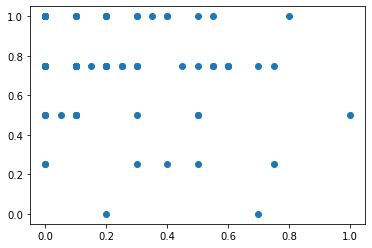

In [95]:
plt.scatter(minmax_Df["absences_filled"], minmax_Df["famrel"])

### Standardization

- Much less affected by outliers
- Subtracts the mean of each feature from each value(so that the new mean is zero). Then divides by the standard deviation, so the new distribution is the unit variance. This makes it not bound by a specific range

In [96]:
from sklearn.preprocessing import StandardScaler

### Using the StandardScaler

In [97]:
real_standardizer = StandardScaler()

In [98]:
real_standardizer.fit(student_num_train)

StandardScaler()

In [99]:
student_standard = real_standardizer.transform(student_num_train)

### Overwriting the dataframe with Standard Values

In [100]:
standard_df = pd.DataFrame(student_standard, columns=student_num_train.columns)

In [101]:
minmax_Df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_filled
0,0.6,1.000000,0.333333,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.00,0.75,1.00,0.571429,0.578947,0.578947,0.55
1,0.8,1.000000,1.000000,0.333333,0.333333,0.000000,0.25,0.50,0.75,0.25,0.50,0.25,0.428571,0.473684,0.000000,0.00
2,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.00,0.50,0.50,1.00,1.00,0.50,0.642857,0.684211,0.631579,0.20
3,0.0,1.000000,0.333333,0.000000,0.000000,0.000000,0.50,1.00,0.25,0.00,0.00,0.50,1.000000,1.000000,1.000000,0.50
4,0.6,0.000000,0.000000,0.666667,0.000000,1.000000,1.00,0.25,1.00,0.00,1.00,0.75,0.357143,0.421053,0.526316,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.2,0.333333,0.333333,0.666667,0.333333,0.000000,0.75,0.50,0.50,0.25,0.50,0.75,0.571429,0.684211,0.684211,0.10
75,0.4,0.333333,0.333333,0.000000,0.666667,0.000000,0.75,0.50,0.50,0.00,0.00,0.75,0.357143,0.526316,0.526316,0.20
76,0.2,0.333333,0.000000,0.333333,0.000000,0.000000,0.50,0.50,0.25,0.00,0.50,0.50,0.285714,0.473684,0.421053,0.00
77,0.0,0.000000,0.000000,0.333333,1.000000,0.333333,0.50,0.00,0.25,0.00,0.00,0.00,0.214286,0.526316,0.526316,0.10


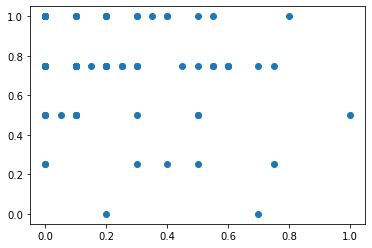

In [102]:
plt.scatter(minmax_Df["absences_filled"], minmax_Df["famrel"])

## Transformation Pipelines